In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
url = "https://raw.githubusercontent.com/akay6483/mmml-ecommerce/main/dataset/E-commerce%20Customer%20Behavior%20-%20Sheet1.csv"

df = pd.read_csv(url)

df.head()
df.shape

(350, 11)

In [15]:
# Force convert numeric columns and replace invalid values with NaN
numeric_cols = ['Age', 'Items Purchased', 'Average Rating',
                'Discount Applied', 'Days Since Last Purchase',
                'Satisfaction Level', 'Total Spend']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Now fill NaN
df = df.fillna(df.median(numeric_only=True))

In [22]:
# Target variable
y = df['Total Spend']

# Input features (NOTICE: Membership Type is removed)
X = df[['Age',
        'Gender',
        'Items Purchased',
        'Average Rating',
        'Discount Applied',
        'Days Since Last Purchase',
        'Satisfaction Level']]

print("X shape before cleaning:", X.shape)
print("y shape:", y.shape)


X shape before cleaning: (350, 7)
y shape: (350,)


In [23]:
# Fill any remaining NaN values inside X with column median
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Ensure y has no NaN values either
y = y.fillna(y.median())

print("NaN values in X after cleaning:\n", X.isnull().sum())
print("NaN values in y:", y.isnull().sum())

NaN values in X after cleaning:
 Age                         0
Gender                      0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64
NaN values in y: 0


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (280, 7)
Testing samples: (70, 7)


In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 37.67934634227967
MSE: 2140.57426794143
R² Score: 0.9841693015855132


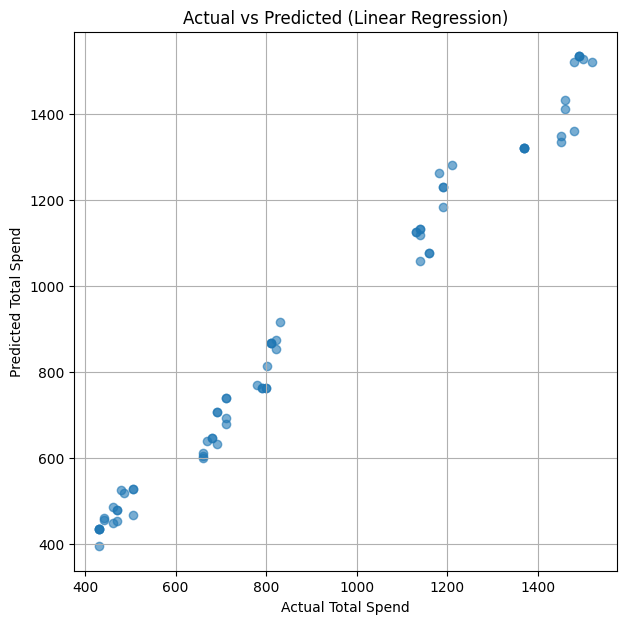

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Total Spend")
plt.ylabel("Predicted Total Spend")
plt.title("Actual vs Predicted (Linear Regression)")
plt.grid(True)
plt.show()